# Intégration du score 4

Je vais utiliser les données d'immatriculation de véhicules électriques nettoyées par Elsa.

Pour les communes, j'utiliserai le fichier zip downloadé comme Mika.

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Point
import shutil
import requests
import os

In [2]:
# Lire le fichier des immatriculations
immatriculations = pd.read_csv('data_for_viz/voitures-rechargeables-par-commune-enrichies.csv',
                               dtype={'code_departement': 'str', 'code_region': 'str', 'siren': 'str'})

immatriculations


/tmp/ipykernel_6995/1131568734.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  immatriculations = pd.read_csv('data_for_viz/voitures-rechargeables-par-commune-enrichies.csv',


,codgeo,libgeo,epci,libepci,date_arrete,nb_vp_rechargeables_el,nb_vp_rechargeables_gaz,nb_vp,code_departement,nom_departement,code_region,nom_region,codes_postaux,population,siren
0,35081,CLAYES,243500139,Rennes Métropole,2022-06-30,9,0,821,35,Ille-et-Vilaine,53,Bretagne,['35590'],908.0,213500812
1,35082,COËSMES,243500634,CC Roche aux Fées Communauté,2020-12-31,2,0,1533,35,Ille-et-Vilaine,53,Bretagne,['35134'],1465.0,213500820
2,35082,COËSMES,243500634,CC Roche aux Fées Communauté,2021-03-31,2,0,1534,35,Ille-et-Vilaine,53,Bretagne,['35134'],1465.0,213500820
3,35082,COËSMES,243500634,CC Roche aux Fées Communauté,2021-12-31,4,0,1545,35,Ille-et-Vilaine,53,Bretagne,['35134'],1465.0,213500820
4,35082,COËSMES,243500634,CC Roche aux Fées Communauté,2022-03-31,6,0,1543,35,Ille-et-Vilaine,53,Bretagne,['35134'],1465.0,213500820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316607,23100,JARNAGES,200067544,CC Creuse Confluence,2021-06-30,3,0,527,23,Creuse,75,Nouvelle-Aquitaine,['23140'],439.0,212310007
316608,23100,JARNAGES,200067544,CC Creuse Confluence,2022-03-31,3,0,534,23,Creuse,75,Nouvelle-Aquitaine,['23140'],439.0,212310007
316609,23100,JARNAGES,200067544,CC Creuse Confluence,2022-06-30,5,0,533,23,Creuse,75,Nouvelle-Aquitaine,['23140'],439.0,212310007
316610,23101,JOUILLAT,200034825,CA du Grand Guéret,2020-12-31,0,0,471,23,Creuse,75,Nouvelle-Aquitaine,['23220'],387.0,212310106


In [3]:
immatriculations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316612 entries, 0 to 316611
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   codgeo                   316612 non-null  object 
 1   libgeo                   316612 non-null  object 
 2   epci                     314625 non-null  object 
 3   libepci                  314625 non-null  object 
 4   date_arrete              316612 non-null  object 
 5   nb_vp_rechargeables_el   316612 non-null  int64  
 6   nb_vp_rechargeables_gaz  316612 non-null  int64  
 7   nb_vp                    316612 non-null  int64  
 8   code_departement         314976 non-null  object 
 9   nom_departement          314940 non-null  object 
 10  code_region              314976 non-null  object 
 11  nom_region               314940 non-null  object 
 12  codes_postaux            314976 non-null  object 
 13  population               314976 non-null  float64
 14  sire

Code postaux manquants

In [4]:
# Mika a récupéré les geojson des communes dans car_vizs et get-geo-data. Apparemment c'est lourd.



data_path = 'datas'
file_name2 = 'communes-20220101'
ext2 = '.shp'
url ='https://www.data.gouv.fr/fr/datasets/r/0e117c06-248f-45e5-8945-0e79d9136165'
temp_path = 'temp_unzip'


try: 
    communes = gpd.read_feather(os.path.join(data_path,file_name2 + '.feather'))
except:
    # Zip file from url  
    zip_file = requests.get(url).content
    os.makedirs(temp_path, exist_ok=True)
    with zipfile.ZipFile(io.BytesIO(zip_file)) as archive:
        archive.extractall(temp_path)
    communes = gpd.read_file(os.path.join(temp_path,file_name2 + ext2))   
    shutil.rmtree(temp_path) 
    
    communes.to_feather(os.path.join(data_path,file_name2 + '.feather'))
    

In [5]:
communes['insee'].value_counts()

2B222    1
11258    1
03135    1
03243    1
03078    1
        ..
08288    1
08196    1
08243    1
51054    1
62187    1
Name: insee, Length: 34955, dtype: int64

In [6]:
communes.geometry[0].centroid.x, communes.geometry[0].centroid.y

(9.338150861836196, 42.374292014354154)

In [7]:
immatriculations

,codgeo,libgeo,epci,libepci,date_arrete,nb_vp_rechargeables_el,nb_vp_rechargeables_gaz,nb_vp,code_departement,nom_departement,code_region,nom_region,codes_postaux,population,siren
0,35081,CLAYES,243500139,Rennes Métropole,2022-06-30,9,0,821,35,Ille-et-Vilaine,53,Bretagne,['35590'],908.0,213500812
1,35082,COËSMES,243500634,CC Roche aux Fées Communauté,2020-12-31,2,0,1533,35,Ille-et-Vilaine,53,Bretagne,['35134'],1465.0,213500820
2,35082,COËSMES,243500634,CC Roche aux Fées Communauté,2021-03-31,2,0,1534,35,Ille-et-Vilaine,53,Bretagne,['35134'],1465.0,213500820
3,35082,COËSMES,243500634,CC Roche aux Fées Communauté,2021-12-31,4,0,1545,35,Ille-et-Vilaine,53,Bretagne,['35134'],1465.0,213500820
4,35082,COËSMES,243500634,CC Roche aux Fées Communauté,2022-03-31,6,0,1543,35,Ille-et-Vilaine,53,Bretagne,['35134'],1465.0,213500820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316607,23100,JARNAGES,200067544,CC Creuse Confluence,2021-06-30,3,0,527,23,Creuse,75,Nouvelle-Aquitaine,['23140'],439.0,212310007
316608,23100,JARNAGES,200067544,CC Creuse Confluence,2022-03-31,3,0,534,23,Creuse,75,Nouvelle-Aquitaine,['23140'],439.0,212310007
316609,23100,JARNAGES,200067544,CC Creuse Confluence,2022-06-30,5,0,533,23,Creuse,75,Nouvelle-Aquitaine,['23140'],439.0,212310007
316610,23101,JOUILLAT,200034825,CA du Grand Guéret,2020-12-31,0,0,471,23,Creuse,75,Nouvelle-Aquitaine,['23220'],387.0,212310106


In [8]:
immatriculations[~immatriculations['codes_postaux'].apply(lambda x: isinstance(x,str))]['libgeo'].value_counts()

FORAINS                   891
NON IDENTIFIE             574
LES TROIS LACS              9
SAINT-THIBAUT               9
SAINT-SIMEUX                9
AMBLEVILLE                  9
PREMIÈRES                   9
CRIMOLOIS                   9
SAINT MARTIN                9
SAINT BARTHELEMY            9
LA FAUTE-SUR-MER            9
MUREILS                     9
VILLERS-SOUS-MONTROND       9
CROIXANVEC                  9
VIMARCÉ                     9
SAINT-MARTIN-DE-CONNÉE      9
CHÂTILLON-SUR-LISON         9
ORLIAGUET                   9
CAZOULÈS                    9
SAINT-LOUP-DE-GONOIS        9
LE JARDIN                   9
Name: libgeo, dtype: int64

In [9]:
# drop these rows for now. TODO : Handle NaN codes_postaux
immatriculations_wo_na = immatriculations[immatriculations['codes_postaux'].apply(lambda x: isinstance(x,str))]
immatriculations_wo_na

,codgeo,libgeo,epci,libepci,date_arrete,nb_vp_rechargeables_el,nb_vp_rechargeables_gaz,nb_vp,code_departement,nom_departement,code_region,nom_region,codes_postaux,population,siren
0,35081,CLAYES,243500139,Rennes Métropole,2022-06-30,9,0,821,35,Ille-et-Vilaine,53,Bretagne,['35590'],908.0,213500812
1,35082,COËSMES,243500634,CC Roche aux Fées Communauté,2020-12-31,2,0,1533,35,Ille-et-Vilaine,53,Bretagne,['35134'],1465.0,213500820
2,35082,COËSMES,243500634,CC Roche aux Fées Communauté,2021-03-31,2,0,1534,35,Ille-et-Vilaine,53,Bretagne,['35134'],1465.0,213500820
3,35082,COËSMES,243500634,CC Roche aux Fées Communauté,2021-12-31,4,0,1545,35,Ille-et-Vilaine,53,Bretagne,['35134'],1465.0,213500820
4,35082,COËSMES,243500634,CC Roche aux Fées Communauté,2022-03-31,6,0,1543,35,Ille-et-Vilaine,53,Bretagne,['35134'],1465.0,213500820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316607,23100,JARNAGES,200067544,CC Creuse Confluence,2021-06-30,3,0,527,23,Creuse,75,Nouvelle-Aquitaine,['23140'],439.0,212310007
316608,23100,JARNAGES,200067544,CC Creuse Confluence,2022-03-31,3,0,534,23,Creuse,75,Nouvelle-Aquitaine,['23140'],439.0,212310007
316609,23100,JARNAGES,200067544,CC Creuse Confluence,2022-06-30,5,0,533,23,Creuse,75,Nouvelle-Aquitaine,['23140'],439.0,212310007
316610,23101,JOUILLAT,200034825,CA du Grand Guéret,2020-12-31,0,0,471,23,Creuse,75,Nouvelle-Aquitaine,['23220'],387.0,212310106


In [10]:
# Several immatriculations have different code postaux
immatriculations_wo_na['codes_postaux'].apply(len).value_counts()

9      311781
18       2691
27        315
36         72
45         63
54         27
81          9
189         9
144         9
Name: codes_postaux, dtype: int64

In [11]:
# We could get only last "date_arrete"
immatriculations['date_arrete'].value_counts()

2022-12-31    35183
2022-09-30    35182
2022-06-30    35180
2020-12-31    35178
2021-03-31    35178
2022-03-31    35178
2021-06-30    35178
2021-09-30    35178
2021-12-31    35177
Name: date_arrete, dtype: int64

In [12]:
# We are getting closer to number of communes
immatriculations_recent=immatriculations[immatriculations['date_arrete']=='2022-12-31']
immatriculations_recent

,codgeo,libgeo,epci,libepci,date_arrete,nb_vp_rechargeables_el,nb_vp_rechargeables_gaz,nb_vp,code_departement,nom_departement,code_region,nom_region,codes_postaux,population,siren
10,35086,COMBOURTILLÉ,200072452,CA Fougères Agglomération,2022-12-31,9,0,662,35,Ille-et-Vilaine,53,Bretagne,['35210'],611.0,213500861
13,35087,CORNILLÉ,200039022,CA Vitré Communauté,2022-12-31,6,0,940,35,Ille-et-Vilaine,53,Bretagne,['35500'],964.0,213500879
19,35089,LA COUYÈRE,200070662,CC Bretagne porte de Loire Communauté,2022-12-31,3,0,545,35,Ille-et-Vilaine,53,Bretagne,['35320'],455.0,213500895
29,35091,LE CROUAIS,200038990,CC de Saint-Méen Montauban,2022-12-31,3,0,535,35,Ille-et-Vilaine,53,Bretagne,['35290'],597.0,213500911
32,35092,CUGUEN,243500733,CC Bretagne Romantique,2022-12-31,8,0,991,35,Ille-et-Vilaine,53,Bretagne,['35270'],834.0,213500929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316575,23089,GENOUILLAC,200041556,CC Portes de la Creuse en Marche,2022-12-31,1,0,910,23,Creuse,75,Nouvelle-Aquitaine,['23350'],728.0,212308902
316583,23091,GIOUX,200044014,CC Creuse Grand Sud,2022-12-31,0,0,219,23,Creuse,75,Nouvelle-Aquitaine,['23500'],161.0,212309108
316595,23095,LE GRAND-BOURG,242320000,CC de Bénévent Grand Bourg,2022-12-31,7,0,1363,23,Creuse,75,Nouvelle-Aquitaine,['23240'],1220.0,212309504
316599,23096,GUÉRET,200034825,CA du Grand Guéret,2022-12-31,173,0,13242,23,Creuse,75,Nouvelle-Aquitaine,['23000'],12734.0,212309603


In [13]:
immatriculations_recent[immatriculations_recent['libgeo']=='LE DRENNEC']

,codgeo,libgeo,epci,libepci,date_arrete,nb_vp_rechargeables_el,nb_vp_rechargeables_gaz,nb_vp,code_departement,nom_departement,code_region,nom_region,codes_postaux,population,siren
77795,29047,LE DRENNEC,242900553,CC du Pays des Abers,2022-12-31,18,0,1971,29,Finistère,53,Bretagne,['29860'],1877.0,212900476


In [14]:
# check NaN in there, mostly linked to forains
immatriculations_recent[immatriculations_recent['codes_postaux'].isna()]['libgeo'].value_counts()

FORAINS                   99
NON IDENTIFIE             66
MUREILS                    1
SAINT-THIBAUT              1
SAINT MARTIN               1
VIMARCÉ                    1
LA FAUTE-SUR-MER           1
CROIXANVEC                 1
VILLERS-SOUS-MONTROND      1
CHÂTILLON-SUR-LISON        1
CAZOULÈS                   1
LE JARDIN                  1
SAINT-LOUP-DE-GONOIS       1
SAINT-SIMEUX               1
ORLIAGUET                  1
PREMIÈRES                  1
CRIMOLOIS                  1
SAINT BARTHELEMY           1
LES TROIS LACS             1
SAINT-MARTIN-DE-CONNÉE     1
AMBLEVILLE                 1
Name: libgeo, dtype: int64

In [15]:
immatriculations_recent[immatriculations_recent['libgeo']=='FORAINS']

,codgeo,libgeo,epci,libepci,date_arrete,nb_vp_rechargeables_el,nb_vp_rechargeables_gaz,nb_vp,code_departement,nom_departement,code_region,nom_region,codes_postaux,population,siren
1570,36999,FORAINS,NaN,NaN,2022-12-31,0,0,214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2396,37999,FORAINS,NaN,NaN,2022-12-31,0,0,371,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5673,43999,FORAINS,NaN,NaN,2022-12-31,0,0,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7304,45999,FORAINS,NaN,NaN,2022-12-31,0,0,877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8276,46999,FORAINS,NaN,NaN,2022-12-31,0,0,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300652,7999,FORAINS,NaN,NaN,2022-12-31,0,0,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302017,8999,FORAINS,NaN,NaN,2022-12-31,0,0,308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
305760,5999,FORAINS,NaN,NaN,2022-12-31,0,0,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308875,11999,FORAINS,NaN,NaN,2022-12-31,0,0,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
immatriculations_recent[immatriculations_recent['libgeo']=='NON IDENTIFIE']

,codgeo,libgeo,epci,libepci,date_arrete,nb_vp_rechargeables_el,nb_vp_rechargeables_gaz,nb_vp,code_departement,nom_departement,code_region,nom_region,codes_postaux,population,siren
16608,34997,NON IDENTIFIE,NaN,NaN,2022-12-31,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20446,67997,NON IDENTIFIE,NaN,NaN,2022-12-31,0,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24808,52997,NON IDENTIFIE,NaN,NaN,2022-12-31,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34674,59997,NON IDENTIFIE,NaN,NaN,2022-12-31,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36718,60997,NON IDENTIFIE,NaN,NaN,2022-12-31,0,0,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293406,97897,NON IDENTIFIE,NaN,NaN,2022-12-31,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
294963,17997,NON IDENTIFIE,NaN,NaN,2022-12-31,0,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297985,1997,NON IDENTIFIE,NaN,NaN,2022-12-31,0,0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
303006,9997,NON IDENTIFIE,NaN,NaN,2022-12-31,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Look into communes with several codes postaux
immatriculations_recent_wo_na=immatriculations_recent[~immatriculations_recent['codes_postaux'].isna()]
immatriculations_recent_wo_na

,codgeo,libgeo,epci,libepci,date_arrete,nb_vp_rechargeables_el,nb_vp_rechargeables_gaz,nb_vp,code_departement,nom_departement,code_region,nom_region,codes_postaux,population,siren
10,35086,COMBOURTILLÉ,200072452,CA Fougères Agglomération,2022-12-31,9,0,662,35,Ille-et-Vilaine,53,Bretagne,['35210'],611.0,213500861
13,35087,CORNILLÉ,200039022,CA Vitré Communauté,2022-12-31,6,0,940,35,Ille-et-Vilaine,53,Bretagne,['35500'],964.0,213500879
19,35089,LA COUYÈRE,200070662,CC Bretagne porte de Loire Communauté,2022-12-31,3,0,545,35,Ille-et-Vilaine,53,Bretagne,['35320'],455.0,213500895
29,35091,LE CROUAIS,200038990,CC de Saint-Méen Montauban,2022-12-31,3,0,535,35,Ille-et-Vilaine,53,Bretagne,['35290'],597.0,213500911
32,35092,CUGUEN,243500733,CC Bretagne Romantique,2022-12-31,8,0,991,35,Ille-et-Vilaine,53,Bretagne,['35270'],834.0,213500929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316575,23089,GENOUILLAC,200041556,CC Portes de la Creuse en Marche,2022-12-31,1,0,910,23,Creuse,75,Nouvelle-Aquitaine,['23350'],728.0,212308902
316583,23091,GIOUX,200044014,CC Creuse Grand Sud,2022-12-31,0,0,219,23,Creuse,75,Nouvelle-Aquitaine,['23500'],161.0,212309108
316595,23095,LE GRAND-BOURG,242320000,CC de Bénévent Grand Bourg,2022-12-31,7,0,1363,23,Creuse,75,Nouvelle-Aquitaine,['23240'],1220.0,212309504
316599,23096,GUÉRET,200034825,CA du Grand Guéret,2022-12-31,173,0,13242,23,Creuse,75,Nouvelle-Aquitaine,['23000'],12734.0,212309603


In [18]:
# Several communes have different code postaux
immatriculations_recent_wo_na['codes_postaux'].apply(len).value_counts()

9      34644
18       299
27        35
36         8
45         7
54         3
81         1
144        1
189        1
Name: codes_postaux, dtype: int64

In [19]:
# This is the case of big cities for instance. We may want to explode these rows in several rows
immatriculations_recent_wo_na[immatriculations_recent_wo_na['codes_postaux'].apply(len)>9]

,codgeo,libgeo,epci,libepci,date_arrete,nb_vp_rechargeables_el,nb_vp_rechargeables_gaz,nb_vp,code_departement,nom_departement,code_region,nom_region,codes_postaux,population,siren
254,35163,LUITRÉ-DOMPIERRE,200072452,CA Fougères Agglomération,2022-12-31,31,0,1963,35,Ille-et-Vilaine,53,Bretagne,"['35133', '35210']",1823.0,200084002
485,35238,RENNES,243500139,Rennes Métropole,2022-12-31,2181,7,157301,35,Ille-et-Vilaine,53,Bretagne,"['35000', '35200', '35700']",220488.0,213502388
1637,37021,BEAUMONT-LOUESTAULT,200073237,CC de Gâtine et Choisilles - Pays de Racan,2022-12-31,30,0,1700,37,Indre-et-Loire,24,Centre-Val de Loire,"['37360', '37370']",1719.0,200071124
2999,38225,AUTRANS-MÉAUDRE EN VERCORS,243801024,CC du Massif du Vercors,2022-12-31,60,0,3266,38,Isère,84,Auvergne-Rhône-Alpes,"['38112', '38880']",3039.0,200056224
4557,42218,SAINT-ÉTIENNE,244200770,Saint-Etienne Métropole,2022-12-31,1888,33,149003,42,Loire,84,Auvergne-Rhône-Alpes,"['42000', '42100', '42230']",173821.0,214202186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311315,14591,AURE SUR MER,200066801,CC Isigny-Omaha Intercom,2022-12-31,7,0,821,14,Calvados,28,Normandie,"['14520', '14710']",732.0,200073377
312045,15142,NEUVÉGLISE-SUR-TRUYÈRE,200066660,CC Saint-Flour Communauté,2022-12-31,9,0,2141,15,Cantal,84,Auvergne-Rhône-Alpes,"['15100', '15260']",1735.0,200065191
312388,15267,YTRAC,241500230,CA du Bassin d'Aurillac,2022-12-31,59,0,4461,15,Cantal,84,Auvergne-Rhône-Alpes,"['15000', '15130']",4335.0,211502679
312688,16110,COURCÔME,200043016,CC Val de Charente,2022-12-31,5,0,904,16,Charente,75,Nouvelle-Aquitaine,"['16240', '16700']",777.0,200086429


In [20]:
# Example of Paris
immatriculations_recent_wo_na[
    (immatriculations_recent_wo_na['libgeo'].str.contains('PARIS'))
]


,codgeo,libgeo,epci,libepci,date_arrete,nb_vp_rechargeables_el,nb_vp_rechargeables_gaz,nb_vp,code_departement,nom_departement,code_region,nom_region,codes_postaux,population,siren
28440,71343,PARIS-L'HÔPITAL,200006682,"CA Beaune, Côte et Sud - Communauté Beaune-Cha...",2022-12-31,5,0,299,71,Saône-et-Loire,27,Bourgogne-Franche-Comté,['71150'],318.0,217103431
70398,38485,SEYSSINET-PARISET,200040715,Grenoble-Alpes-Métropole,2022-12-31,191,2,11663,38,Isère,84,Auvergne-Rhône-Alpes,['38170'],11891.0,213804859
81846,77514,VILLEPARISIS,200055655,CA Roissy Pays de France,2022-12-31,217,0,24766,77,Seine-et-Marne,11,Île-de-France,['77270'],26580.0,217705144
88215,75104,PARIS 4E ARRONDISSEMENT,NaN,NaN,2022-12-31,530,0,12816,75,Paris,11,Île-de-France,['75004'],29131.0,NaN
88220,75106,PARIS 6E ARRONDISSEMENT,NaN,NaN,2022-12-31,894,0,21293,75,Paris,11,Île-de-France,['75006'],40303.0,NaN
88244,75116,PARIS 16E ARRONDISSEMENT,NaN,NaN,2022-12-31,5983,4,114864,75,Paris,11,Île-de-France,"['75016', '75116']",165523.0,NaN
88248,75117,PARIS 17E ARRONDISSEMENT,NaN,NaN,2022-12-31,3984,5,93139,75,Paris,11,Île-de-France,['75017'],166543.0,NaN
88251,75118,PARIS 18E ARRONDISSEMENT,NaN,NaN,2022-12-31,1037,9,71873,75,Paris,11,Île-de-France,['75018'],192468.0,NaN
137377,75101,PARIS 1ER ARRONDISSEMENT,NaN,NaN,2022-12-31,1284,2,13287,75,Paris,11,Île-de-France,['75001'],15917.0,NaN
137381,75103,PARIS 3E ARRONDISSEMENT,NaN,NaN,2022-12-31,574,0,13074,75,Paris,11,Île-de-France,['75003'],34025.0,NaN


In [21]:
communes['nom_upper']=communes['nom'].str.upper()
communes

,insee,nom,wikipedia,surf_ha,geometry,nom_upper
0,2B222,Pie-d'Orezza,fr:Pie-d'Orezza,573.0,"POLYGON ((9.32017 42.38507, 9.32028 42.38510, ...",PIE-D'OREZZA
1,2B137,Lano,fr:Lano,824.0,"POLYGON ((9.20010 42.39013, 9.20014 42.39014, ...",LANO
2,2B051,Cambia,fr:Cambia,833.0,"POLYGON ((9.27757 42.37509, 9.27758 42.37512, ...",CAMBIA
3,2B106,Érone,fr:Érone,393.0,"POLYGON ((9.25119 42.37605, 9.25132 42.37603, ...",ÉRONE
4,2B185,Oletta,fr:Oletta,2674.0,"POLYGON ((9.28340 42.66273, 9.28345 42.66273, ...",OLETTA
...,...,...,...,...,...,...
34950,80122,Bouquemaison,fr:Bouquemaison,724.0,"POLYGON ((2.31459 50.23489, 2.31746 50.23535, ...",BOUQUEMAISON
34951,62795,Sibiville,fr:Sibiville,738.0,"POLYGON ((2.30945 50.31902, 2.30969 50.31913, ...",SIBIVILLE
34952,62694,Rebreuve-sur-Canche,fr:Rebreuve-sur-Canche,842.0,"POLYGON ((2.32074 50.24767, 2.32077 50.24771, ...",REBREUVE-SUR-CANCHE
34953,62831,Troisvaux,fr:Troisvaux,620.0,"POLYGON ((2.32046 50.40520, 2.32137 50.40571, ...",TROISVAUX


In [22]:
communes[communes['nom_upper'].str.contains('PARIS')]

,insee,nom,wikipedia,surf_ha,geometry,nom_upper
1207,38485,Seyssinet-Pariset,fr:Seyssinet-Pariset,1078.0,"POLYGON ((5.63864 45.15350, 5.63886 45.15434, ...",SEYSSINET-PARISET
6812,39189,Damparis,fr:Damparis,895.0,"POLYGON ((5.36102 47.07591, 5.36207 47.07670, ...",DAMPARIS
10410,71343,Paris-l'Hôpital,fr:Paris-l'Hôpital,275.0,"POLYGON ((4.62839 46.90759, 4.62841 46.90787, ...",PARIS-L'HÔPITAL
25829,95176,Cormeilles-en-Parisis,fr:Cormeilles-en-Parisis,844.0,"POLYGON ((2.17335 48.95349, 2.17398 48.95391, ...",CORMEILLES-EN-PARISIS
26071,81202,Parisot,fr:Parisot (Tarn),2871.0,"POLYGON ((1.78504 43.80676, 1.78506 43.80678, ...",PARISOT
26261,82137,Parisot,fr:Parisot (Tarn-et-Garonne),2822.0,"POLYGON ((1.81972 44.28128, 1.81976 44.28131, ...",PARISOT
27694,62826,Le Touquet-Paris-Plage,fr:Le Touquet-Paris-Plage,1528.0,"POLYGON ((1.57614 50.48773, 1.57616 50.48790, ...",LE TOUQUET-PARIS-PLAGE
32143,77514,Villeparisis,fr:Villeparisis,842.0,"POLYGON ((2.59139 48.95008, 2.59142 48.95030, ...",VILLEPARISIS
32282,75056,Paris,fr:Paris,10539.0,"POLYGON ((2.22412 48.85420, 2.22416 48.85461, ...",PARIS
33849,95241,Fontenay-en-Parisis,fr:Fontenay-en-Parisis,1102.0,"POLYGON ((2.41128 49.05330, 2.41333 49.05611, ...",FONTENAY-EN-PARISIS


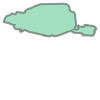

In [23]:
communes.iloc[32282]['geometry']

**All arrondissements of Paris need to be summed to Paris with codgeo 75056. Probably need to do this for all communes with multiple codes-postaux**

# Join immatriculations and communes dataframes
Let's see how a quick join performs. Then, we will have to process big cities like said above.

In [24]:
communes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 34955 entries, 0 to 34954
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   insee      34955 non-null  object  
 1   nom        34955 non-null  object  
 2   wikipedia  34951 non-null  object  
 3   surf_ha    34955 non-null  float64 
 4   geometry   34955 non-null  geometry
 5   nom_upper  34955 non-null  object  
dtypes: float64(1), geometry(1), object(4)
memory usage: 1.6+ MB


In [25]:
immatriculations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316612 entries, 0 to 316611
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   codgeo                   316612 non-null  object 
 1   libgeo                   316612 non-null  object 
 2   epci                     314625 non-null  object 
 3   libepci                  314625 non-null  object 
 4   date_arrete              316612 non-null  object 
 5   nb_vp_rechargeables_el   316612 non-null  int64  
 6   nb_vp_rechargeables_gaz  316612 non-null  int64  
 7   nb_vp                    316612 non-null  int64  
 8   code_departement         314976 non-null  object 
 9   nom_departement          314940 non-null  object 
 10  code_region              314976 non-null  object 
 11  nom_region               314940 non-null  object 
 12  codes_postaux            314976 non-null  object 
 13  population               314976 non-null  float64
 14  sire

In [26]:
# Convert codgeo and insee to str in both dataframes before joining because some are integers. But universal format should be string because of corsica codes 2A001
communes.insee=communes.insee.astype(str)
immatriculations_recent=immatriculations[(immatriculations['date_arrete']=='2022-12-31')].copy()
immatriculations_recent.codgeo=immatriculations_recent.codgeo.astype(str)
immatriculations_recent['codgeo']=immatriculations_recent['codgeo'].apply(lambda x : '0'+x if len(x) == 4 else x )

In [27]:
communes[communes['nom']=='Marseille']

,insee,nom,wikipedia,surf_ha,geometry,nom_upper
13905,13055,Marseille,fr:Marseille,24214.0,"MULTIPOLYGON (((5.22863 43.19774, 5.22866 43.1...",MARSEILLE


In [28]:
immatriculations_recent

,codgeo,libgeo,epci,libepci,date_arrete,nb_vp_rechargeables_el,nb_vp_rechargeables_gaz,nb_vp,code_departement,nom_departement,code_region,nom_region,codes_postaux,population,siren
10,35086,COMBOURTILLÉ,200072452,CA Fougères Agglomération,2022-12-31,9,0,662,35,Ille-et-Vilaine,53,Bretagne,['35210'],611.0,213500861
13,35087,CORNILLÉ,200039022,CA Vitré Communauté,2022-12-31,6,0,940,35,Ille-et-Vilaine,53,Bretagne,['35500'],964.0,213500879
19,35089,LA COUYÈRE,200070662,CC Bretagne porte de Loire Communauté,2022-12-31,3,0,545,35,Ille-et-Vilaine,53,Bretagne,['35320'],455.0,213500895
29,35091,LE CROUAIS,200038990,CC de Saint-Méen Montauban,2022-12-31,3,0,535,35,Ille-et-Vilaine,53,Bretagne,['35290'],597.0,213500911
32,35092,CUGUEN,243500733,CC Bretagne Romantique,2022-12-31,8,0,991,35,Ille-et-Vilaine,53,Bretagne,['35270'],834.0,213500929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316575,23089,GENOUILLAC,200041556,CC Portes de la Creuse en Marche,2022-12-31,1,0,910,23,Creuse,75,Nouvelle-Aquitaine,['23350'],728.0,212308902
316583,23091,GIOUX,200044014,CC Creuse Grand Sud,2022-12-31,0,0,219,23,Creuse,75,Nouvelle-Aquitaine,['23500'],161.0,212309108
316595,23095,LE GRAND-BOURG,242320000,CC de Bénévent Grand Bourg,2022-12-31,7,0,1363,23,Creuse,75,Nouvelle-Aquitaine,['23240'],1220.0,212309504
316599,23096,GUÉRET,200034825,CA du Grand Guéret,2022-12-31,173,0,13242,23,Creuse,75,Nouvelle-Aquitaine,['23000'],12734.0,212309603


In [29]:
cities_with_arrondissements=['PARIS', 'MARSEILLE', 'LYON']

for city in cities_with_arrondissements:
    immatriculations_recent.loc[
        immatriculations_recent['libgeo']==f'{city} ND',
        ['nb_vp', 'nb_vp_rechargeables_gaz', 'nb_vp_rechargeables_el']
    ] = immatriculations_recent[
        (immatriculations_recent['libgeo'].str.contains(city))
        &(immatriculations_recent['libgeo'].str.contains('ARRONDISSEMENT') | immatriculations_recent['libgeo'].str.contains('ND'))
    ][['nb_vp', 'nb_vp_rechargeables_gaz', 'nb_vp_rechargeables_el']].sum().values

In [30]:
immatriculations_recent.drop(immatriculations_recent[
        (immatriculations_recent['libgeo'].str.contains('ARRONDISSEMENT'))
].index,inplace=True)

In [31]:
immatriculations_recent.loc[immatriculations_recent['libgeo']=='LES TROIS LACS', 'codgeo']='27058'
# A lot of small communes were part of bigger ones, they should be aggregated in the bigger commune as below in a perfect setup
immatriculations_recent.loc[
    immatriculations_recent['libgeo'].isin(["LA FAUTE-SUR-MER", "LA TRANCHE-SUR-MER"]),
    ['nb_vp', 'nb_vp_rechargeables_gaz', 'nb_vp_rechargeables_el']
] =immatriculations_recent[immatriculations_recent['libgeo'].isin(["LA FAUTE-SUR-MER", "LA TRANCHE-SUR-MER"])][['nb_vp', 'nb_vp_rechargeables_gaz', 'nb_vp_rechargeables_el']].sum().values

In [32]:
immatriculations_recent.drop(immatriculations_recent[
        (immatriculations_recent['libgeo']=="LA FAUTE-SUR-MER")
].index,inplace=True)

**Cleaning done**

In [33]:
# immatriculations : codgeo = code INSEE commune ; communes : insee
immatriculations_with_communes = immatriculations_recent.merge(communes, left_on='codgeo', right_on='insee', how='left')
immatriculations_with_communes

,codgeo,libgeo,epci,libepci,date_arrete,nb_vp_rechargeables_el,nb_vp_rechargeables_gaz,nb_vp,code_departement,nom_departement,...,nom_region,codes_postaux,population,siren,insee,nom,wikipedia,surf_ha,geometry,nom_upper
0,35086,COMBOURTILLÉ,200072452,CA Fougères Agglomération,2022-12-31,9,0,662,35,Ille-et-Vilaine,...,Bretagne,['35210'],611.0,213500861,35086,Combourtillé,fr:Combourtillé,930.0,"POLYGON ((-1.29941 48.26056, -1.29939 48.26108...",COMBOURTILLÉ
1,35087,CORNILLÉ,200039022,CA Vitré Communauté,2022-12-31,6,0,940,35,Ille-et-Vilaine,...,Bretagne,['35500'],964.0,213500879,35087,Cornillé,fr:Cornillé,1259.0,"POLYGON ((-1.34503 48.07816, -1.34495 48.07825...",CORNILLÉ
2,35089,LA COUYÈRE,200070662,CC Bretagne porte de Loire Communauté,2022-12-31,3,0,545,35,Ille-et-Vilaine,...,Bretagne,['35320'],455.0,213500895,35089,La Couyère,fr:La Couyère,1197.0,"POLYGON ((-1.54524 47.90162, -1.54521 47.90172...",LA COUYÈRE
3,35091,LE CROUAIS,200038990,CC de Saint-Méen Montauban,2022-12-31,3,0,535,35,Ille-et-Vilaine,...,Bretagne,['35290'],597.0,213500911,35091,Le Crouais,fr:Le Crouais,631.0,"POLYGON ((-2.17839 48.21770, -2.17835 48.21772...",LE CROUAIS
4,35092,CUGUEN,243500733,CC Bretagne Romantique,2022-12-31,8,0,991,35,Ille-et-Vilaine,...,Bretagne,['35270'],834.0,213500929,35092,Cuguen,fr:Cuguen,2377.0,"POLYGON ((-1.69940 48.45353, -1.69939 48.45372...",CUGUEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35132,23089,GENOUILLAC,200041556,CC Portes de la Creuse en Marche,2022-12-31,1,0,910,23,Creuse,...,Nouvelle-Aquitaine,['23350'],728.0,212308902,23089,Genouillac,fr:Genouillac (Creuse),3566.0,"POLYGON ((1.93836 46.35242, 1.93842 46.35335, ...",GENOUILLAC
35133,23091,GIOUX,200044014,CC Creuse Grand Sud,2022-12-31,0,0,219,23,Creuse,...,Nouvelle-Aquitaine,['23500'],161.0,212309108,23091,Gioux,fr:Gioux,3744.0,"POLYGON ((2.06140 45.78837, 2.06211 45.78922, ...",GIOUX
35134,23095,LE GRAND-BOURG,242320000,CC de Bénévent Grand Bourg,2022-12-31,7,0,1363,23,Creuse,...,Nouvelle-Aquitaine,['23240'],1220.0,212309504,23095,Le Grand-Bourg,fr:Le Grand-Bourg,7891.0,"POLYGON ((1.57648 46.18273, 1.57652 46.18283, ...",LE GRAND-BOURG
35135,23096,GUÉRET,200034825,CA du Grand Guéret,2022-12-31,173,0,13242,23,Creuse,...,Nouvelle-Aquitaine,['23000'],12734.0,212309603,23096,Guéret,fr:Guéret,2608.0,"POLYGON ((1.83821 46.15193, 1.83893 46.15220, ...",GUÉRET


In [34]:
# Check remaining NaN. Lot of small cities that we will ignore for now.
with pd.option_context('display.max_rows', None, 'display.max_columns', 100):
    display(immatriculations_with_communes[immatriculations_with_communes['nom'].isna()].sort_values('nb_vp_rechargeables_el'))

,codgeo,libgeo,epci,libepci,date_arrete,nb_vp_rechargeables_el,nb_vp_rechargeables_gaz,nb_vp,code_departement,nom_departement,code_region,nom_region,codes_postaux,population,siren,insee,nom,wikipedia,surf_ha,geometry,nom_upper
178,36999,FORAINS,NaN,NaN,2022-12-31,0,0,214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
22268,06999,FORAINS,NaN,NaN,2022-12-31,0,0,505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
22320,13999,FORAINS,NaN,NaN,2022-12-31,0,0,601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
22508,14999,FORAINS,NaN,NaN,2022-12-31,0,0,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
23373,18999,FORAINS,NaN,NaN,2022-12-31,0,0,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
23470,19999,FORAINS,NaN,NaN,2022-12-31,0,0,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
23683,08997,NON IDENTIFIE,NaN,NaN,2022-12-31,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
24198,44999,FORAINS,NaN,NaN,2022-12-31,0,0,1218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
24304,45997,NON IDENTIFIE,NaN,NaN,2022-12-31,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
22085,03999,FORAINS,NaN,NaN,2022-12-31,0,0,171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [35]:
immatriculations_with_communes.drop(immatriculations_with_communes[
        immatriculations_with_communes['nom'].isna()
].index,inplace=True)

# Compute score 4
Need to project communes shapes to x and y coordinates using espg 2154

In [36]:
communes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [37]:
communes_xy = communes.to_crs(2154).drop(['nom','wikipedia','surf_ha','nom_upper'], axis=1).rename(columns={'geometry':'geometry_xy'})
communes_xy

,insee,geometry_xy
0,2B222,"POLYGON ((1220731.039 6163639.566, 1220739.763..."
1,2B137,"POLYGON ((1210814.726 6163416.773, 1210817.799..."
2,2B051,"POLYGON ((1217316.939 6162253.420, 1217317.229..."
3,2B106,"POLYGON ((1215139.391 6162187.448, 1215150.029..."
4,2B185,"POLYGON ((1215252.372 6194187.789, 1215257.020..."
...,...,...
34950,80122,"POLYGON ((651041.150 7015422.701, 651246.099 7..."
34951,62795,"POLYGON ((650755.948 7024794.794, 650773.074 7..."
34952,62694,"POLYGON ((651492.525 7016841.569, 651494.612 7..."
34953,62831,"POLYGON ((651623.240 7034387.023, 651688.408 7..."


In [38]:
# immatriculations : codgeo = code INSEE commune ; communes : insee
immatriculations_with_communes_xy = immatriculations_with_communes.merge(communes_xy, on='insee', how='left')
immatriculations_with_communes_xy['x']=immatriculations_with_communes_xy['geometry_xy'].apply(lambda x: x.centroid.x)
immatriculations_with_communes_xy['y']=immatriculations_with_communes_xy['geometry_xy'].apply(lambda x: x.centroid.y)
immatriculations_with_communes_xy

,codgeo,libgeo,epci,libepci,date_arrete,nb_vp_rechargeables_el,nb_vp_rechargeables_gaz,nb_vp,code_departement,nom_departement,...,siren,insee,nom,wikipedia,surf_ha,geometry,nom_upper,geometry_xy,x,y
0,35086,COMBOURTILLÉ,200072452,CA Fougères Agglomération,2022-12-31,9,0,662,35,Ille-et-Vilaine,...,213500861,35086,Combourtillé,fr:Combourtillé,930.0,"POLYGON ((-1.29941 48.26056, -1.29939 48.26108...",COMBOURTILLÉ,"POLYGON ((381085.762 6804264.343, 381090.872 6...",383704.803213,6.804748e+06
1,35087,CORNILLÉ,200039022,CA Vitré Communauté,2022-12-31,6,0,940,35,Ille-et-Vilaine,...,213500879,35087,Cornillé,fr:Cornillé,1259.0,"POLYGON ((-1.34503 48.07816, -1.34495 48.07825...",CORNILLÉ,"POLYGON ((376590.555 6784209.276, 376597.017 6...",378939.873851,6.784550e+06
2,35089,LA COUYÈRE,200070662,CC Bretagne porte de Loire Communauté,2022-12-31,3,0,545,35,Ille-et-Vilaine,...,213500895,35089,La Couyère,fr:La Couyère,1197.0,"POLYGON ((-1.54524 47.90162, -1.54521 47.90172...",LA COUYÈRE,"POLYGON ((360576.396 6765463.308, 360579.035 6...",363776.615032,6.764446e+06
3,35091,LE CROUAIS,200038990,CC de Saint-Méen Montauban,2022-12-31,3,0,535,35,Ille-et-Vilaine,...,213500911,35091,Le Crouais,fr:Le Crouais,631.0,"POLYGON ((-2.17839 48.21770, -2.17835 48.21772...",LE CROUAIS,"POLYGON ((315660.315 6803424.185, 315662.803 6...",317626.629529,6.802384e+06
4,35092,CUGUEN,243500733,CC Bretagne Romantique,2022-12-31,8,0,991,35,Ille-et-Vilaine,...,213500929,35092,Cuguen,fr:Cuguen,2377.0,"POLYGON ((-1.69940 48.45353, -1.69939 48.45372...",CUGUEN,"POLYGON ((352725.510 6827365.781, 352727.350 6...",355815.013586,6.825753e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34946,23089,GENOUILLAC,200041556,CC Portes de la Creuse en Marche,2022-12-31,1,0,910,23,Creuse,...,212308902,23089,Genouillac,fr:Genouillac (Creuse),3566.0,"POLYGON ((1.93836 46.35242, 1.93842 46.35335, ...",GENOUILLAC,"POLYGON ((618364.809 6584159.089, 618371.099 6...",622626.713223,6.583255e+06
34947,23091,GIOUX,200044014,CC Creuse Grand Sud,2022-12-31,0,0,219,23,Creuse,...,212309108,23091,Gioux,fr:Gioux,3744.0,"POLYGON ((2.06140 45.78837, 2.06211 45.78922, ...",GIOUX,"POLYGON ((627081.242 6521405.234, 627137.753 6...",631238.489669,6.522847e+06
34948,23095,LE GRAND-BOURG,242320000,CC de Bénévent Grand Bourg,2022-12-31,7,0,1363,23,Creuse,...,212309504,23095,Le Grand-Bourg,fr:Le Grand-Bourg,7891.0,"POLYGON ((1.57648 46.18273, 1.57652 46.18283, ...",LE GRAND-BOURG,"POLYGON ((590201.552 6565755.686, 590204.423 6...",596272.593579,6.563130e+06
34949,23096,GUÉRET,200034825,CA du Grand Guéret,2022-12-31,173,0,13242,23,Creuse,...,212309603,23096,Guéret,fr:Guéret,2608.0,"POLYGON ((1.83821 46.15193, 1.83893 46.15220, ...",GUÉRET,"POLYGON ((610337.213 6562005.851, 610393.483 6...",612879.376088,6.563160e+06


In [39]:
def distance_in_km(current_x, current_y, target_x,target_y):
    return np.sqrt((current_x-target_x)**2+(current_y-target_y)**2)/1000

In [40]:
gamma=5 # sum of all cars

def score_4_commune(
    electric_cars_array:np.ndarray,
    x_array:np.ndarray,
    y_array:np.ndarray,
    target_commune_x:float,
    target_commune_y:float,
):
    "Compute score 4 for the commune given its name in column 'nom'. df should have a 'geometry_xy' column."
    # Get cars in 20 km around the commune
    distance_to_target_km=np.sqrt((x_array-target_commune_x)**2+(y_array-target_commune_y)**2)/1000
    close_cars= np.copy(electric_cars_array[distance_to_target_km<20])
    
    score = np.sum(close_cars / (1+gamma*distance_to_target_km[distance_to_target_km<20]))
    
    return score

In [44]:
communes_cars_nb_and_xy_array=immatriculations_with_communes_xy[['nb_vp_rechargeables_el','x','y']].values
communes_cars_nb_and_xy_array

array([[9.00000000e+00, 3.83704803e+05, 6.80474794e+06],
       [6.00000000e+00, 3.78939874e+05, 6.78455023e+06],
       [3.00000000e+00, 3.63776615e+05, 6.76444641e+06],
       ...,
       [7.00000000e+00, 5.96272594e+05, 6.56313001e+06],
       [1.73000000e+02, 6.12879376e+05, 6.56315973e+06],
       [0.00000000e+00, 6.29397373e+05, 6.57773160e+06]])

In [46]:
immatriculations_with_communes_xy_array=immatriculations_with_communes_xy[['x','y']].values

In [47]:
%%time
np_scores=[]
for x,y in immatriculations_with_communes_xy_array:
    np_scores.append(score_4_commune(communes_cars_nb_and_xy_array[:,0],communes_cars_nb_and_xy_array[:,1],communes_cars_nb_and_xy_array[:,2], x, y))
np_scores

CPU times: user 4.56 s, sys: 0 ns, total: 4.56 s
Wall time: 4.56 s


[34.76533419644982,
 42.3636535893652,
 29.46996742957004,
 16.15885540516452,
 22.803327258230055,
 273.9205567070751,
 85.25803487422674,
 42.487165535104246,
 23.47505753574556,
 213.90092244769366,
 65.00255581486577,
 14.649861521857181,
 37.46412130233898,
 42.026297169400884,
 28.980490249175475,
 66.74639930678921,
 19.262598853283365,
 27.609015883300888,
 15.309303538046699,
 19.459755112001773,
 198.0741433761137,
 84.58934242709391,
 152.85033335236253,
 83.88646918843335,
 51.45101206424434,
 183.9928081802754,
 27.247872368830357,
 39.656424541013095,
 95.2530262935505,
 99.4095640727683,
 23.96495519228629,
 59.42008417826514,
 34.33465691761665,
 50.09994353040109,
 24.52514042371058,
 33.10950688924895,
 20.669131598848743,
 25.501640501948483,
 86.90116878669998,
 21.742402404625068,
 52.51996424151907,
 15.232144560375701,
 224.0749649811258,
 172.1030433878468,
 50.94062189903852,
 24.470682795639107,
 17.416861766648726,
 47.35053172042375,
 192.92598031971082,
 30

In [48]:
immatriculations_with_communes_xy['score_4']=np_scores
immatriculations_with_communes_xy[immatriculations_with_communes_xy['libgeo']=='LE DRENNEC']

,codgeo,libgeo,epci,libepci,date_arrete,nb_vp_rechargeables_el,nb_vp_rechargeables_gaz,nb_vp,code_departement,nom_departement,...,insee,nom,wikipedia,surf_ha,geometry,nom_upper,geometry_xy,x,y,score_4
8532,29047,LE DRENNEC,242900553,CC du Pays des Abers,2022-12-31,18,0,1971,29,Finistère,...,29047,Le Drennec,fr:Le Drennec,958.0,"POLYGON ((-4.40802 48.54363, -4.40787 48.54358...",LE DRENNEC,"POLYGON ((153983.073 6852675.566, 153994.037 6...",155786.924059,6.851318e+06,83.647442
